<a href="https://colab.research.google.com/github/SebastianCastellanosM/Parcial-III/blob/main/Solucion_Test_III_2023_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEMA 1

In [80]:
import pandas as pd

# Ruta del archivo en Colab
ruta_del_archivo = '/content/usuarios_twitter.csv'

# Cargar el DataFrame
usuarios_twitter = pd.read_csv(ruta_del_archivo)


In [81]:
# Muestra los nombres de las columnas en tus datos
print(datos.columns)


Index(['usuario', 'op', 'co', 'ex', 'ag', 'ne', 'wordcount', 'categoria',
       'Cluster'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

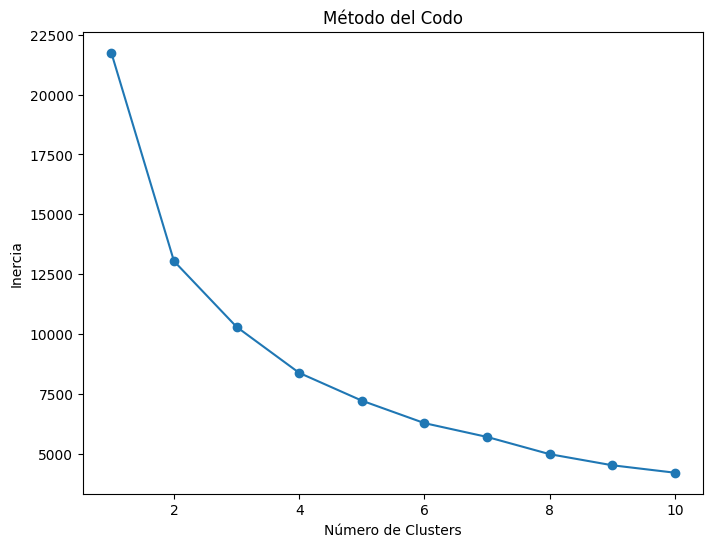

In [82]:
inercias = []

# Probamos con un rango de clusters de 1 a 10
for i in range(1, 11):
    modelo_kmeans = KMeans(n_clusters=i, random_state=42)
    modelo_kmeans.fit(datos_cluster)
    inercias.append(modelo_kmeans.inertia_)

# Visualización del método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inercias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

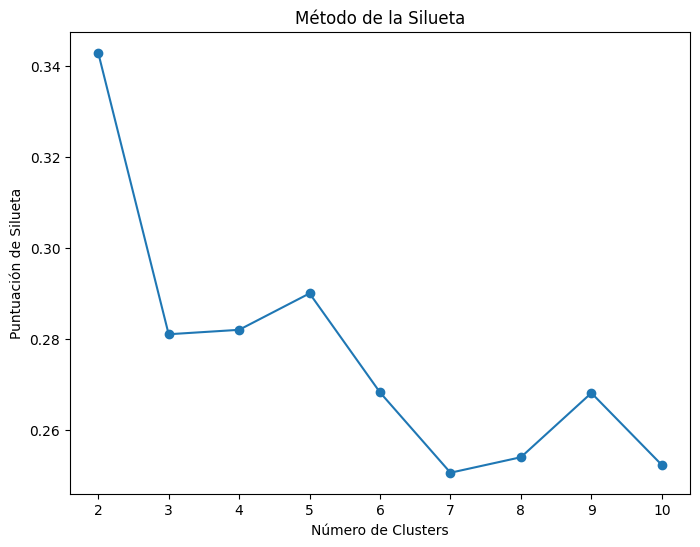

In [71]:
from sklearn.metrics import silhouette_score

silueta_scores = []

# Probamos con un rango de clusters de 2 a 10
for i in range(2, 11):
    modelo_kmeans = KMeans(n_clusters=i, random_state=42)
    etiquetas = modelo_kmeans.fit_predict(datos_cluster)
    silueta = silhouette_score(datos_cluster, etiquetas)
    silueta_scores.append(silueta)

# Visualización del método de la silueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silueta_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


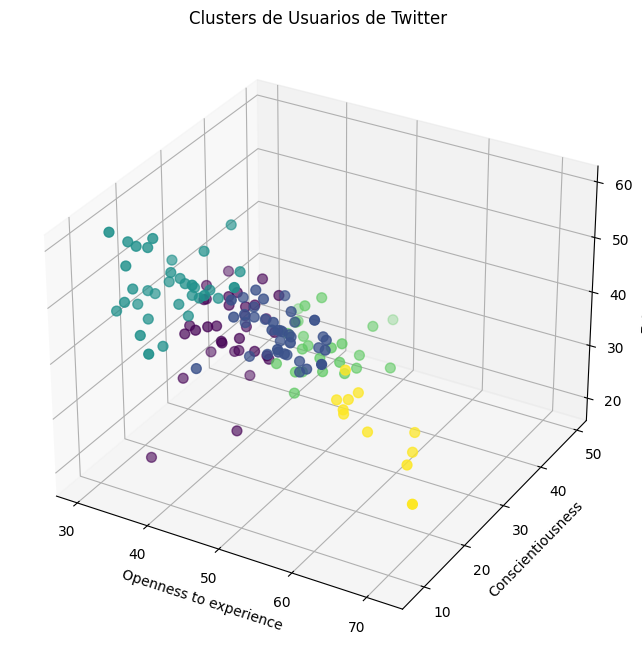

In [75]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecciona las características para el clustering
caracteristicas = ["op", "co", "ex"]

# Filtra el DataFrame solo con las características seleccionadas
datos_cluster = datos[caracteristicas]

# Ajusta el modelo KMeans con 5 clusters (puedes ajustar este valor)
modelo_kmeans = KMeans(n_clusters=5, random_state=42)
modelo_kmeans.fit(datos_cluster)

# Agrega la columna de clusters al DataFrame original
datos["Cluster"] = modelo_kmeans.labels_

# Visualización de los clusters en un gráfico 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(datos["op"], datos["co"], datos["ex"], c=datos["Cluster"], cmap="viridis", s=50)

ax.set_xlabel("Openness to experience")
ax.set_ylabel("Conscientiousness")
ax.set_zlabel("Extraversion")

plt.title("Clusters de Usuarios de Twitter")
plt.show()


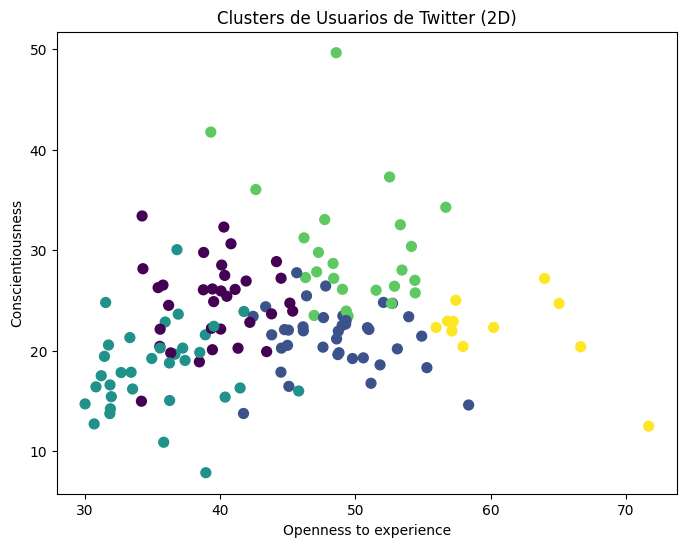

In [76]:
plt.figure(figsize=(8, 6))

plt.scatter(datos["op"], datos["co"], c=datos["Cluster"], cmap="viridis", s=50)
plt.xlabel("Openness to experience")
plt.ylabel("Conscientiousness")
plt.title("Clusters de Usuarios de Twitter (2D)")

plt.show()


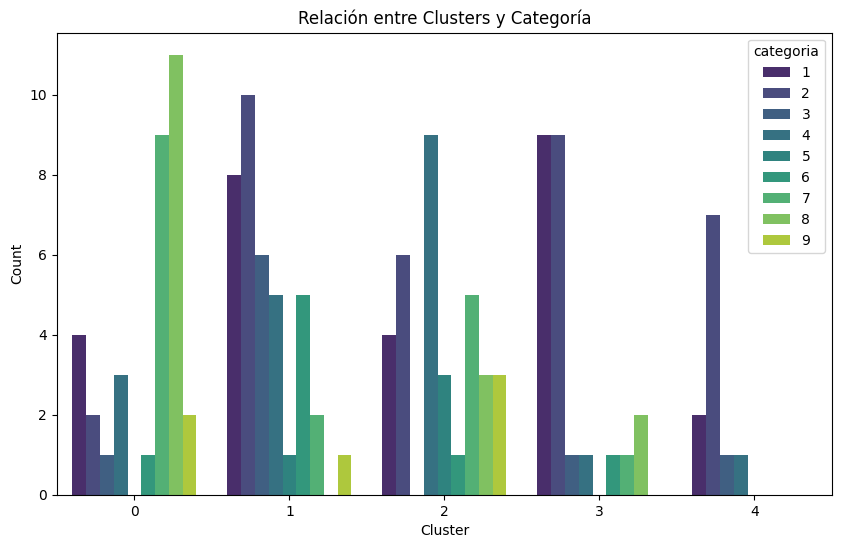

In [77]:
import seaborn as sns

# Visualización de la relación entre clusters y la variable de salida
plt.figure(figsize=(10, 6))
sns.countplot(x="Cluster", hue="categoria", data=datos, palette="viridis")
plt.title("Relación entre Clusters y Categoría")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


In [ ]:
#@title **Pregunta 1. Respuesta abierta**
#@markdown ¿Cuál es el número adecuado de cluster?
respuesta_1 = "\"Al realizar el c\xE1lculo del clusters con dos metodos Elbow Method y Silhouette vemos que obtenemos que la mejor cantidad de cluster es de 5. Ya que si observamos la gr\xE1fica de Elbow Method vemos que hasta el 5 se ve una disminuci\xF3n significativa, lo que ya no se ve a partir de ah\xED. En la grafica de Silhouette vemos que el 5 es la puntaci\xF3n m\xE1s alta lo que tambi\xE9n nos hace concluir que 5 cl\xFAster son los mejores para este problema" #@param {type:"string"}

In [ ]:
#@title **Pregunta 2. Respuesta abierta**
#@markdown ¿Qué interpretación le dan a los grupos que se han formado?
respuesta_2 = "Se puede decir que en los cluster se encuentras varias mezclas de las diferentes categorias, puede que en algunos unas categorias sean mayores y tendriamos que entrar a mirar los valores medios para poder determinar a qu\xE9 cl\xFAster pertenecen las distintas categor\xEDas obtenidas. puede que las caracter\xEDsticas que haya seleccionado no hayan sido las mejores para la clasificaci\xF3n entre los clusters" #@param {type:"string"}

# PROBLEMA 2

***GridSearchCV***

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generar datos
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=3,
    cluster_std=1.2,
    shuffle=True,
    random_state=0
)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

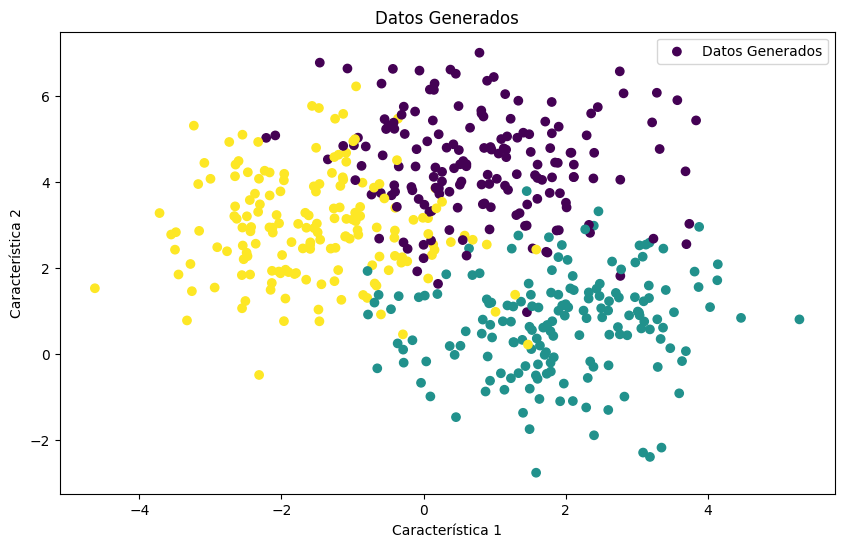

In [62]:
# Crear una gráfica de dispersión para los datos generados
plt.figure(figsize=(10, 6))

# Muestras del conjunto de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', label='Datos Generados')

plt.title('Datos Generados')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()


In [63]:
# Definir el modelo MLP
modelo_rna = MLPClassifier(max_iter=1000, random_state=42)

# Definir los parámetros a buscar
parametros = {
    'hidden_layer_sizes': [(5,), (10,), (20,), (30,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Configurar GridSearchCV con 5 K-Fold validación cruzada
grid_search = GridSearchCV(estimator=modelo_rna, param_grid=parametros, cv=5)

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Mejores hiperparámetros: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10,)}


In [46]:
# Mostrar los mejores hiperparámetros y la puntuación correspondiente
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación en validación cruzada:", grid_search.best_score_)

# Obtener el modelo con los mejores hiperparámetros
mejor_modelo_grid = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
precision_test_grid = mejor_modelo_grid.score(X_test, y_test)
print("Precisión en el conjunto de prueba:", precision_test_grid)


Mejores hiperparámetros: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10,)}
Mejor puntuación en validación cruzada: 0.8699999999999999
Precisión en el conjunto de prueba: 0.88


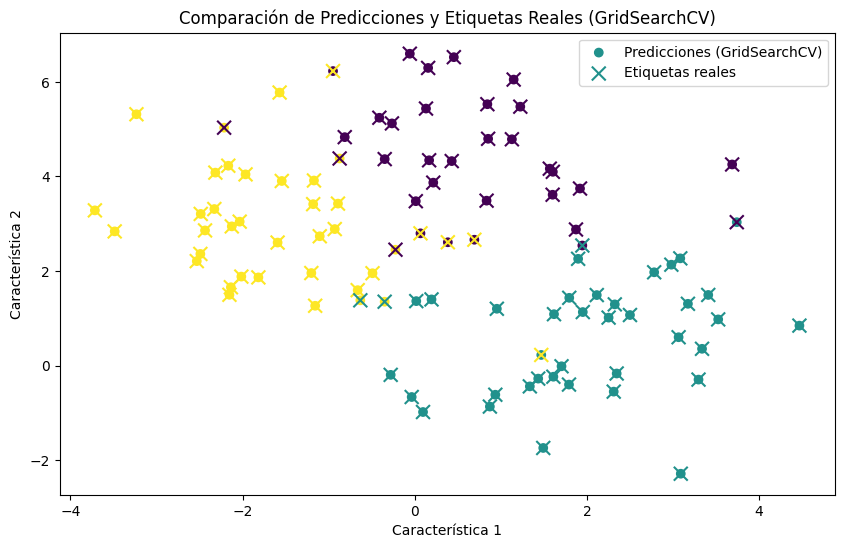

In [57]:
import matplotlib.pyplot as plt

# Crear una gráfica de dispersión para las predicciones y las etiquetas reales (GridSearchCV)
plt.figure(figsize=(10, 6))

# Muestras del conjunto de prueba
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicciones_grid, cmap='viridis', marker='o', label='Predicciones (GridSearchCV)')

# Etiquetas reales
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', s=100, label='Etiquetas reales')

plt.title('Comparación de Predicciones y Etiquetas Reales (GridSearchCV)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()


**RandomizedSearchCV**

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform


# Definir el modelo MLP
modelo_rna = MLPClassifier(max_iter=1000, random_state=42)

# Definir los rangos de hiperparámetros para la búsqueda aleatoria
parametros_random = {
    'hidden_layer_sizes': [(5,), (10,), (20,), (30,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': uniform(1e-4, 1e-2),  # Rango continuo de valores para alpha
}
# Configurar RandomizedSearchCV con 5 K-Fold validación cruzada
random_search = RandomizedSearchCV(estimator=modelo_rna, param_distributions=parametros_random, n_iter=10, cv=5, random_state=42)

# Ajustar el modelo a los datos
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Mejores hiperparámetros: {'activation': 'logistic', 'alpha': 0.008065429868602328, 'hidden_layer_sizes': (20,)}


In [51]:
# Mostrar los mejores hiperparámetros y la puntuación correspondiente
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor puntuación en validación cruzada:", random_search.best_score_)

# Obtener el modelo con los mejores hiperparámetros
mejor_modelo_random = random_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
precision_test_random = mejor_modelo_random.score(X_test, y_test)
print("Precisión en el conjunto de prueba:", precision_test_random)


Mejores hiperparámetros: {'activation': 'logistic', 'alpha': 0.008065429868602328, 'hidden_layer_sizes': (20,)}
Mejor puntuación en validación cruzada: 0.8699999999999999
Precisión en el conjunto de prueba: 0.88


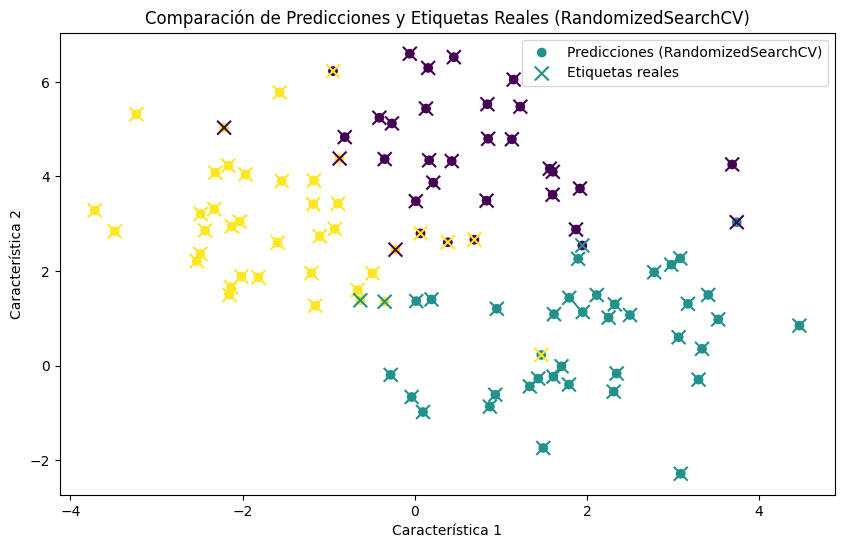

In [58]:
# Crear una gráfica de dispersión para las predicciones y las etiquetas reales (RandomizedSearchCV)
plt.figure(figsize=(10, 6))

# Muestras del conjunto de prueba
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicciones_random, cmap='viridis', marker='o', label='Predicciones (RandomizedSearchCV)')

# Etiquetas reales
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', s=100, label='Etiquetas reales')

plt.title('Comparación de Predicciones y Etiquetas Reales (RandomizedSearchCV)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import accuracy_score

# Predicciones del modelo GridSearchCV
predicciones_grid = mejor_modelo_grid.predict(X_test)
precision_test_grid = accuracy_score(y_test, predicciones_grid)
print("Precisión en el conjunto de prueba (GridSearchCV):", precision_test_grid)

# Predicciones del modelo RandomizedSearchCV
predicciones_random = mejor_modelo_random.predict(X_test)
precision_test_random = accuracy_score(y_test, predicciones_random)
print("Precisión en el conjunto de prueba (RandomizedSearchCV):", precision_test_random)


Precisión en el conjunto de prueba (GridSearchCV): 0.88
Precisión en el conjunto de prueba (RandomizedSearchCV): 0.88


In [ ]:
#@title **Pregunta 1. Respuesta abierta**
#@markdown  ¿Cuál es la configuración de la RNA que te generó mejor accuracy? considerando la métrica accuracy para decidir, complejidad del modelo y gasto computacional.
respuesta_2 = "En el an\xE1lisis que hice respecto a los dos problemas me dio igual acurracy (0.88) ya tendr\xEDamos que entrar a buscar los otros parametros para poder decidir cual de los dos sea mejor ya sea en costo computacional o en la misma complejidad" #@param {type:"string"}